# 1: Initial EDA

## 1.1: Dataset Information, Removing Duplicates, Basic Transformations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Read the CSV file
raw_df = pd.read_csv('../data/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')
print("\nFirst few rows:")
display(raw_df.head(10))


First few rows:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
5,2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,63 years,275000.0
6,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,280000.0
7,2017-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1976,58 years 04 months,285000.0
8,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,285000.0
9,2017-01,ANG MO KIO,3 ROOM,571,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1979,61 years 04 months,285000.0


In [2]:
# Display basic information about the dataset
print("Dataset Info:")
print(raw_df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381165 entries, 0 to 381164
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                381165 non-null  object 
 1   town                 381165 non-null  object 
 2   flat_type            381165 non-null  object 
 3   block                381165 non-null  object 
 4   street_name          381165 non-null  object 
 5   storey_range         381165 non-null  object 
 6   floor_area_sqm       381165 non-null  float64
 7   flat_model           381165 non-null  object 
 8   lease_commence_date  381165 non-null  int64  
 9   remaining_lease      381165 non-null  object 
 10  resale_price         381165 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 32.0+ MB
None


In [3]:
def convert_lease_to_months(lease_str):
    years, months = 0, 0  # Default values

    # Extract years
    year_match = re.search(r'(\d+)\s*years?', lease_str)
    if year_match:
        years = int(year_match.group(1))

    # Extract months
    month_match = re.search(r'(\d+)\s*months?', lease_str)
    if month_match:
        months = int(month_match.group(1))

    return years * 12 + months  # Convert to total months

# Apply function to column
raw_df["remaining_lease_months"] = raw_df["remaining_lease"].apply(convert_lease_to_months)

# Convert month column to datetime
raw_df['month_dt'] = pd.to_datetime(raw_df['month'])

In [4]:
duplicates = raw_df[raw_df.duplicated()]
display(duplicates)
num_duplicates = raw_df.duplicated().sum()
print(f"Total duplicate rows: {num_duplicates}")
df = raw_df.drop_duplicates()
df.info()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,remaining_lease_months,month_dt
243,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0,684,2017-01-01
305,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0,734,2017-01-01
510,2017-01,JURONG EAST,4 ROOM,265,TOH GUAN RD,04 TO 06,101.0,Model A,1998,80 years 09 months,470000.0,969,2017-01-01
591,2017-01,JURONG WEST,4 ROOM,337A,TAH CHING RD,19 TO 21,92.0,Model A,2010,92 years 03 months,470000.0,1107,2017-01-01
672,2017-01,PASIR RIS,4 ROOM,753,PASIR RIS ST 71,01 TO 03,105.0,Model A,1996,78 years 10 months,368000.0,946,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381160,2025-02,YISHUN,EXECUTIVE,328,YISHUN RING RD,01 TO 03,142.0,Apartment,1988,62 years 05 months,845000.0,749,2025-02-01
381161,2025-01,YISHUN,EXECUTIVE,614,YISHUN ST 61,04 TO 06,146.0,Maisonette,1987,61 years 05 months,800000.0,737,2025-01-01
381162,2025-02,YISHUN,EXECUTIVE,723,YISHUN ST 71,07 TO 09,146.0,Maisonette,1986,60 years 05 months,818888.0,725,2025-02-01
381163,2025-01,YISHUN,EXECUTIVE,836,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,62 years 02 months,960000.0,746,2025-01-01


Total duplicate rows: 180625
<class 'pandas.core.frame.DataFrame'>
Index: 200540 entries, 0 to 200836
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   month                   200540 non-null  object        
 1   town                    200540 non-null  object        
 2   flat_type               200540 non-null  object        
 3   block                   200540 non-null  object        
 4   street_name             200540 non-null  object        
 5   storey_range            200540 non-null  object        
 6   floor_area_sqm          200540 non-null  float64       
 7   flat_model              200540 non-null  object        
 8   lease_commence_date     200540 non-null  int64         
 9   remaining_lease         200540 non-null  object        
 10  resale_price            200540 non-null  float64       
 11  remaining_lease_months  200540 non-null  int64         
 12  month_

## 1.2: Target Value (resale_price) Distribution

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]),
 [Text(0, 0.0, '0'),
  Text(0, 2000.0, '2000'),
  Text(0, 4000.0, '4000'),
  Text(0, 6000.0, '6000'),
  Text(0, 8000.0, '8000'),
  Text(0, 10000.0, '10000'),
  Text(0, 12000.0, '12000'),
  Text(0, 14000.0, '14000'),
  Text(0, 16000.0, '16000')])

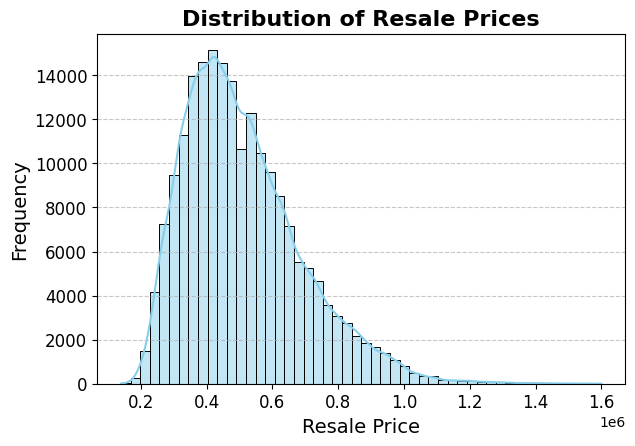

In [5]:
# Create some basic visualizations
plt.figure(figsize=(15,10))

# Plot 1: Distribution of resale prices
plt.subplot(2,2,1)
sns.histplot(data=df, x='resale_price', bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Resale Prices', fontsize=16, fontweight='bold')
plt.xlabel('Resale Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

## 1.3: Average Resale price over Time

/var/folders/qn/2b8ykc751b396vqz3_bbcqlw0000gn/T/ipykernel_47963/1669044738.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['month_dt'].dt.year


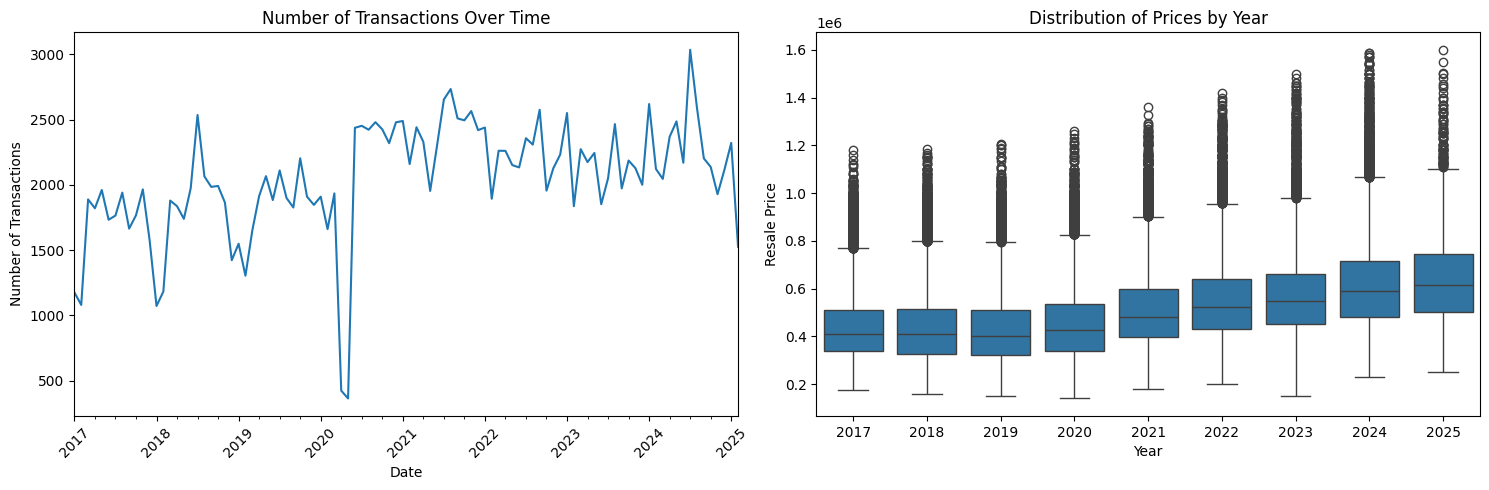


Date Range in Dataset:
Earliest date: 2017-01-01 00:00:00
Latest date: 2025-02-01 00:00:00

Total number of months: 98


In [6]:
# Create visualizations for temporal analysis
plt.figure(figsize=(15,5))

# Plot 1: Distribution of transactions over time
plt.subplot(1,2,1)
df['month_dt'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

# Plot 2: Box plot of prices over time (yearly)
plt.subplot(1,2,2)
df['year'] = df['month_dt'].dt.year
sns.boxplot(data=df, x='year', y='resale_price')
plt.title('Distribution of Prices by Year')
plt.xlabel('Year')
plt.ylabel('Resale Price')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nDate Range in Dataset:")
print(f"Earliest date: {df['month_dt'].min()}")
print(f"Latest date: {df['month_dt'].max()}")
print(f"\nTotal number of months: {df['month_dt'].nunique()}")

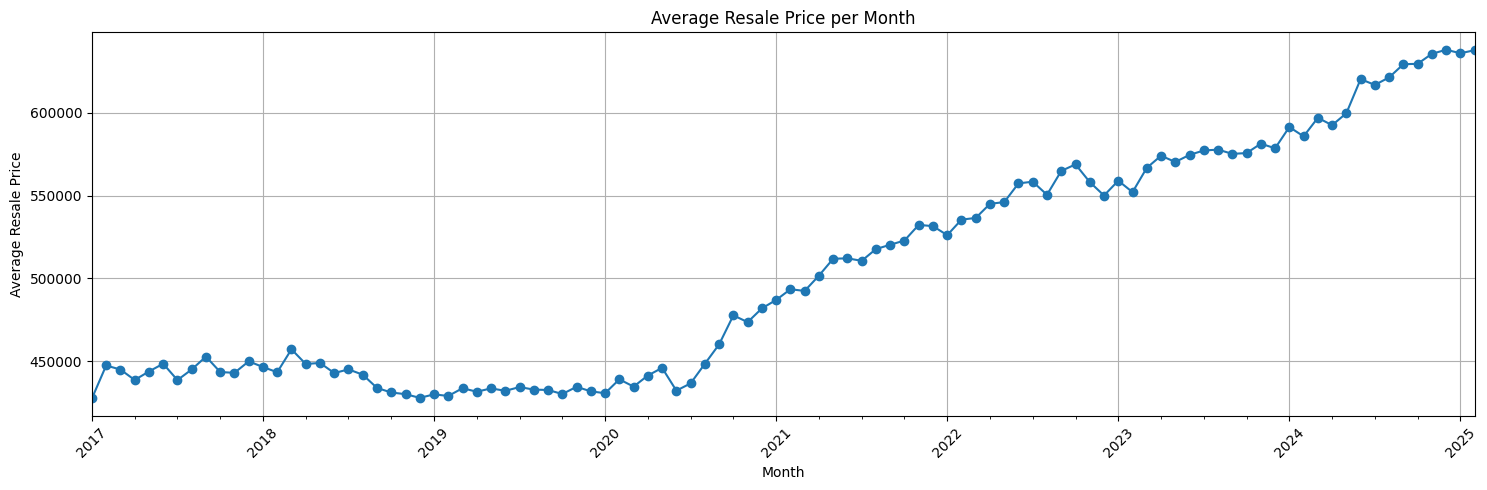

In [7]:
avg_price_per_month = df.groupby(df['month_dt'].dt.to_period('M'))['resale_price'].mean()
plt.figure(figsize=(15,5))
avg_price_per_month.plot(kind='line', marker='o')
plt.title('Average Resale Price per Month')
plt.xlabel('Month')
plt.ylabel('Average Resale Price')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

## 1.4 Price Distribution across Towns

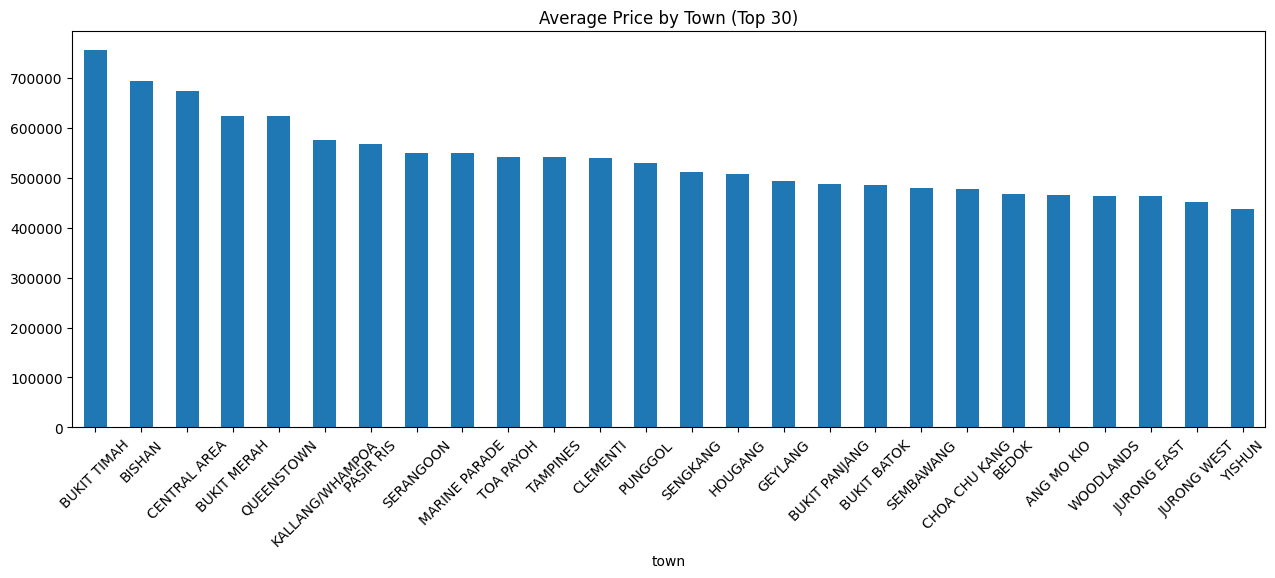

In [8]:
plt.figure(figsize=(25,10))
plt.subplot(2,2,4)
avg_price_by_town = df.groupby('town')['resale_price'].mean().sort_values(ascending=False).head(30)
avg_price_by_town.plot(kind='bar')
plt.title('Average Price by Town (Top 30)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 1.5: Price Distribution across Flat Type

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '2 ROOM'),
  Text(1, 0, '3 ROOM'),
  Text(2, 0, '4 ROOM'),
  Text(3, 0, '5 ROOM'),
  Text(4, 0, 'EXECUTIVE'),
  Text(5, 0, '1 ROOM'),
  Text(6, 0, 'MULTI-GENERATION')])

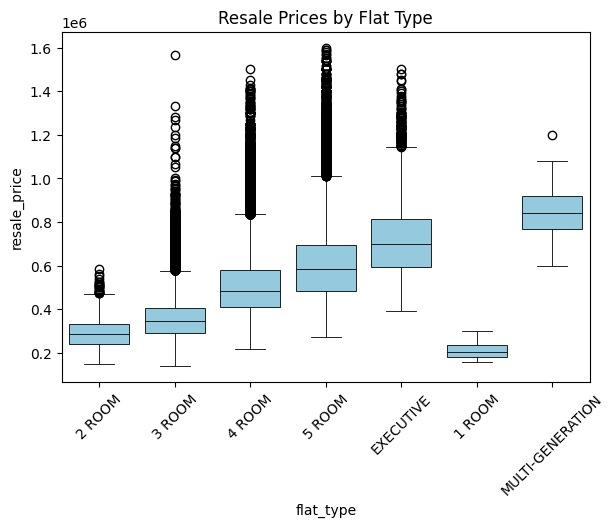

In [9]:

plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
sns.boxplot(data=df, x='flat_type', y='resale_price', color='skyblue', linecolor='black', linewidth= 0.6)
plt.title('Resale Prices by Flat Type')
plt.xticks(rotation=45)

## 1.6: Price Distribution across Storey Range

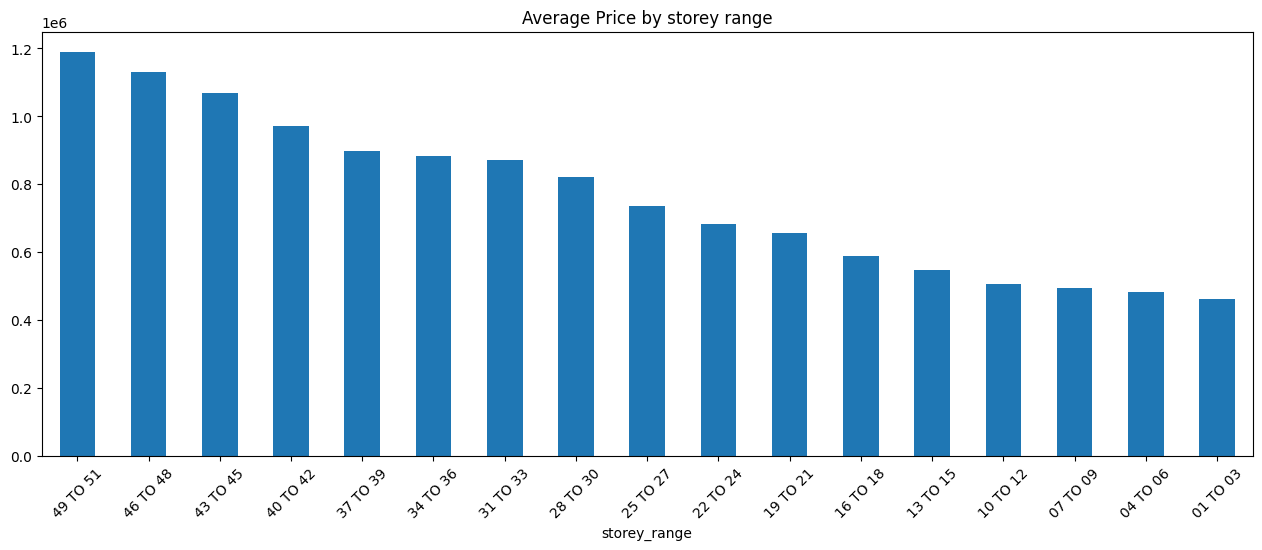

In [10]:
# Plot 4: Average price by town
plt.figure(figsize=(25,10))
plt.subplot(2,2,4)
avg_price_by_town = df.groupby('storey_range')['resale_price'].mean().sort_values(ascending=False)
avg_price_by_town.plot(kind='bar')
plt.title('Average Price by storey range')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, '10 TO 12'),
  Text(1, 0, '01 TO 03'),
  Text(2, 0, '04 TO 06'),
  Text(3, 0, '07 TO 09'),
  Text(4, 0, '13 TO 15'),
  Text(5, 0, '19 TO 21'),
  Text(6, 0, '22 TO 24'),
  Text(7, 0, '16 TO 18'),
  Text(8, 0, '34 TO 36'),
  Text(9, 0, '28 TO 30'),
  Text(10, 0, '37 TO 39'),
  Text(11, 0, '49 TO 51'),
  Text(12, 0, '25 TO 27'),
  Text(13, 0, '40 TO 42'),
  Text(14, 0, '31 TO 33'),
  Text(15, 0, '46 TO 48'),
  Text(16, 0, '43 TO 45')])

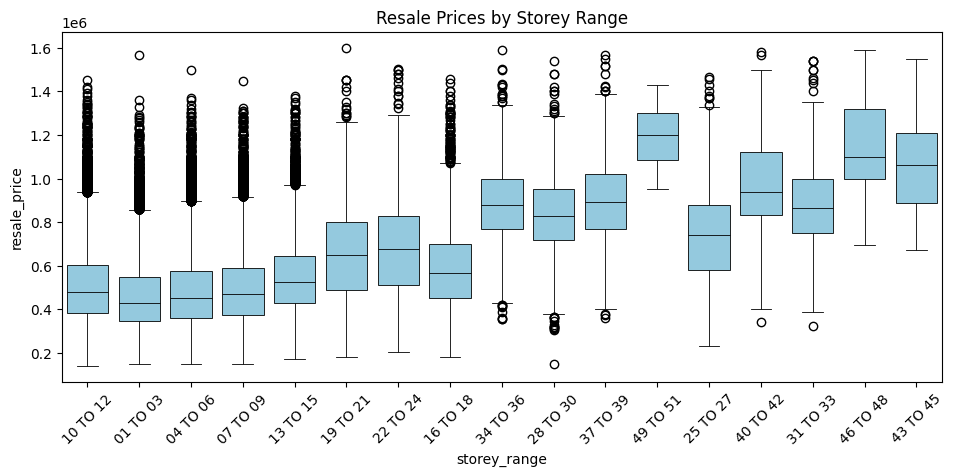

In [11]:
plt.figure(figsize=(25,10))
plt.subplot(2,2,2)
sns.boxplot(data=df, x='storey_range', y='resale_price', color='skyblue', linecolor='black', linewidth= 0.6)
plt.title('Resale Prices by Storey Range')
plt.xticks(rotation=45)

## 1.7 Price Distribution against Floor Area

Text(0.5, 1.0, 'Price vs Floor Area')

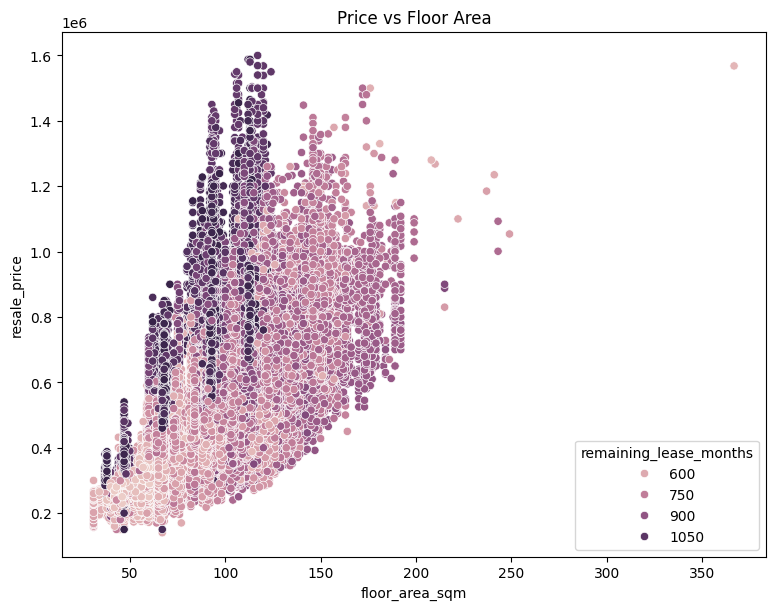

In [12]:
# Plot 3: Price vs Floor Area
plt.figure(figsize=(20,15))
plt.subplot(2,2,3)
sns.scatterplot(data=df, x='floor_area_sqm', y='resale_price', hue = "remaining_lease_months")
plt.title('Price vs Floor Area')

## 1.8 Price Distribution by Flat Model

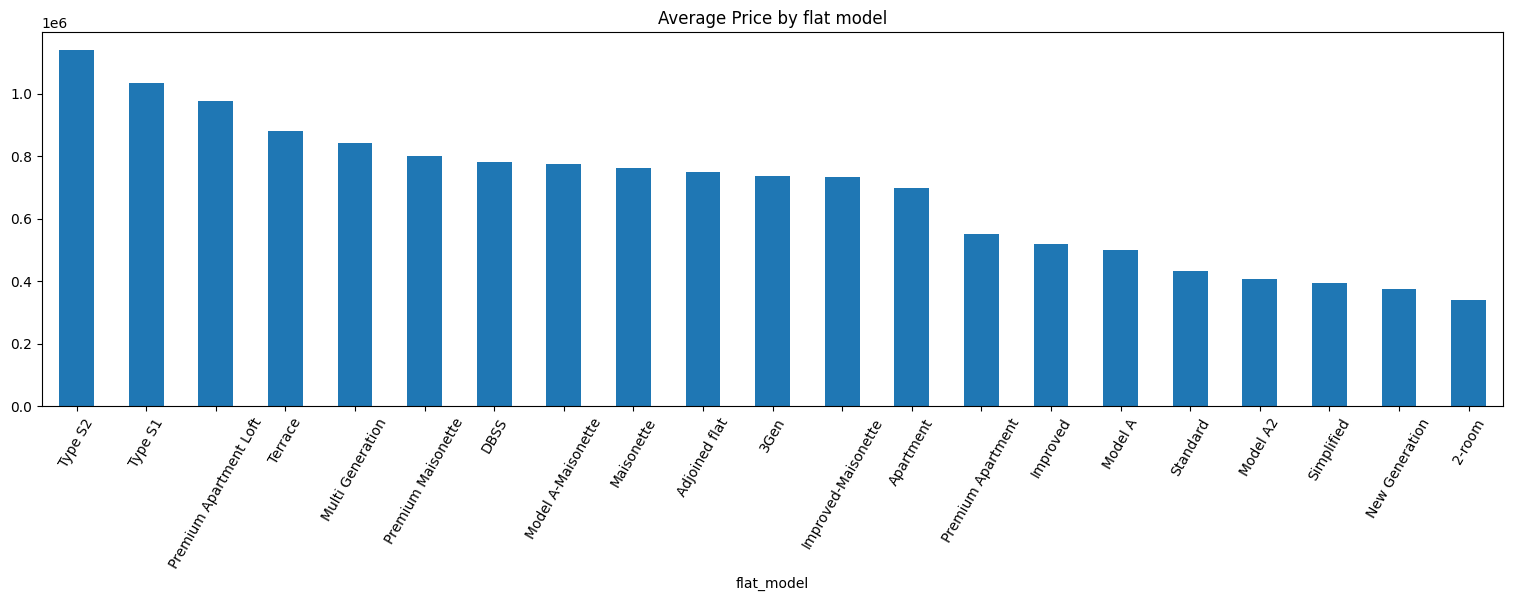

In [13]:
# Plot 4: Average price by flat model
plt.figure(figsize=(30,10))
plt.subplot(2,2,4)
avg_price_by_town = df.groupby('flat_model')['resale_price'].mean().sort_values(ascending=False)
avg_price_by_town.plot(kind='bar')
plt.title('Average Price by flat model')
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Improved'),
  Text(1, 0, 'New Generation'),
  Text(2, 0, 'DBSS'),
  Text(3, 0, 'Standard'),
  Text(4, 0, 'Apartment'),
  Text(5, 0, 'Simplified'),
  Text(6, 0, 'Model A'),
  Text(7, 0, 'Premium Apartment'),
  Text(8, 0, 'Adjoined flat'),
  Text(9, 0, 'Model A-Maisonette'),
  Text(10, 0, 'Maisonette'),
  Text(11, 0, 'Type S1'),
  Text(12, 0, 'Type S2'),
  Text(13, 0, 'Model A2'),
  Text(14, 0, 'Terrace'),
  Text(15, 0, 'Improved-Maisonette'),
  Text(16, 0, 'Premium Maisonette'),
  Text(17, 0, 'Multi Generation'),
  Text(18, 0, 'Premium Apartment Loft'),
  Text(19, 0, '2-room'),
  Text(20, 0, '3Gen')])

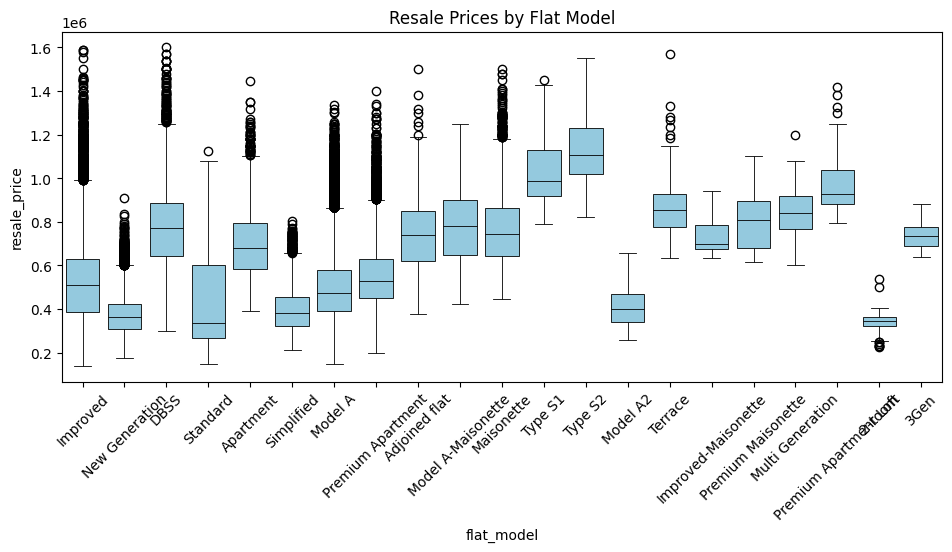

In [17]:
plt.figure(figsize=(25,10))
plt.subplot(2,2,2)
sns.boxplot(data=df, x='flat_model', y='resale_price', color='skyblue', linecolor='black', linewidth= 0.6)
plt.title('Resale Prices by Flat Model')
plt.xticks(rotation=45)

## 1.9 Price Distribution by remaining lease

In [15]:
display(df)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,remaining_lease_months,month_dt,year
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,736,2017-01-01,2017
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,727,2017-01-01,2017
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,749,2017-01-01,2017
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,745,2017-01-01,2017
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,749,2017-01-01,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200832,2025-02,YISHUN,EXECUTIVE,328,YISHUN RING RD,01 TO 03,142.0,Apartment,1988,62 years 05 months,845000.0,749,2025-02-01,2025
200833,2025-01,YISHUN,EXECUTIVE,614,YISHUN ST 61,04 TO 06,146.0,Maisonette,1987,61 years 05 months,800000.0,737,2025-01-01,2025
200834,2025-02,YISHUN,EXECUTIVE,723,YISHUN ST 71,07 TO 09,146.0,Maisonette,1986,60 years 05 months,818888.0,725,2025-02-01,2025
200835,2025-01,YISHUN,EXECUTIVE,836,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,62 years 02 months,960000.0,746,2025-01-01,2025


Text(0.5, 1.0, 'Price vs Remaining Months')

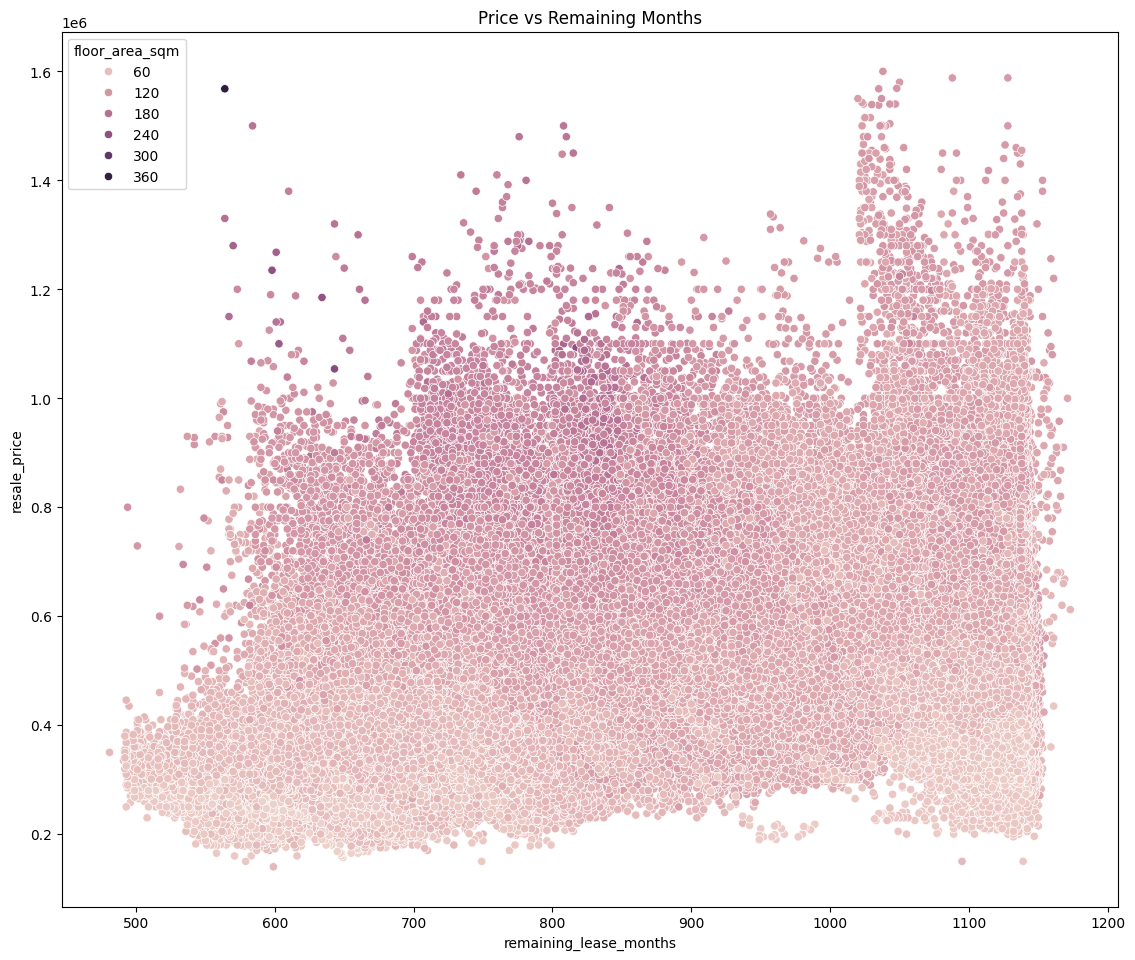

In [16]:

# Create visualizations for temporal analysis
plt.figure(figsize=(30,25))
plt.subplot(2,2,3)
sns.scatterplot(data=df, x='remaining_lease_months', y='resale_price',hue="floor_area_sqm")
plt.title('Price vs Remaining Months')